### This is a mini project using Matplotlib library and using data provided on api.covid19india.org. 

In [2]:
#Import all required Python and Matplot libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

###### Below Chart shows a stacked bar chart displaying daily cases of Confirmed,Recovered and Deceased for latest 5 days

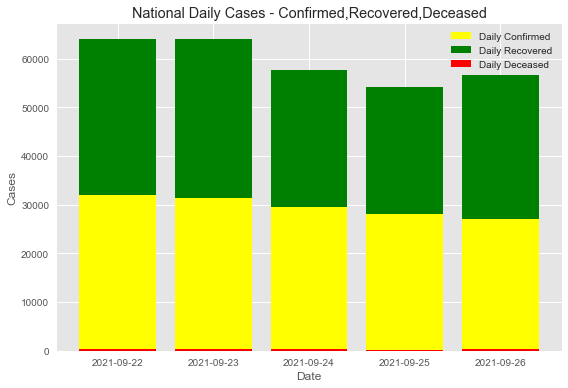

In [142]:
#create dataframe from csv file
d_parse=lambda x:pd.datetime.strptime(x,'%Y-%m-%d')
#data=pd.read_csv('D:\\code\\matplot\\case_time_series.csv',parse_dates=['Date_YMD'],date_parser=d_parse)
data=pd.read_csv('case_time_series.csv',parse_dates=['Date_YMD'],date_parser=d_parse)
df=data.tail()
#convert columns into a list to be used to plot chart
Day=df['Date_YMD'].tolist()
daily_conf=df['Daily Confirmed'].tolist()
daily_rec=df['Daily Recovered'].tolist()
daily_des=df['Daily Deceased'].tolist()
plt.style.use('ggplot')
#plt.style.use('seaborn')
#plt.style.use('fivethirtyeight') 
# create a stacked bar chart using subplot
fig,ax=plt.subplots()
ax.bar(Day,daily_conf,label='Daily Confirmed',color='yellow')
ax.bar(Day,daily_rec,label='Daily Recovered',bottom=daily_conf,color='green')
ax.bar(Day,daily_des,label='Daily Deceased',color='red')
ax.set_ylabel('Cases')
ax.set_xlabel('Date')
ax.set_title('National Daily Cases - Confirmed,Recovered,Deceased')
ax.legend()
plt.tight_layout()
plt.show()

###### Below chart shows daily cases of Confirmed,Recovered and Deceased in Karnataka

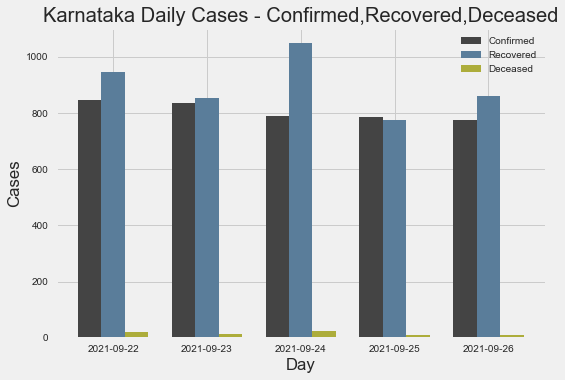

In [262]:
d_parse=lambda x:pd.datetime.strptime(x,'%Y-%m-%d')
data1=pd.read_csv('state_wise_daily.csv',parse_dates=['Date_YMD'],date_parser=d_parse)
df1=data1.tail(15)
df2=df1.loc[:,['Date_YMD','Status','KA']]
df3=df2.set_index('Date_YMD')
df4=df3.pivot(columns='Status',values='KA')
df4.to_csv('temp_file.csv')
data2=pd.read_csv('temp_file.csv',parse_dates=['Date_YMD'],date_parser=d_parse)
date=list(data2['Date_YMD'])
c=list(data2['Confirmed'])
r=list(data2['Recovered'])
d=list(data2['Deceased'])
x = np.arange(len(data2['Date_YMD'].tolist())) 
x_indexes=np.arange(len(date))
width=0.25
plt.bar(x_indexes-width, c,width=width,color='#444444',label='Confirmed')
plt.bar(x_indexes, r,width=width,color='#5a7d9a',label='Recovered')
plt.bar(x_indexes+width, d,width=width,color='#adad3b',label='Deceased')
plt.xticks(x, pd.to_datetime(data2['Date_YMD']).dt.date.tolist())  
plt.title('Karnataka Daily Cases - Confirmed,Recovered,Deceased')
plt.xlabel('Day')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###### Below chart shows Top 5 States having Confirmed,Recovered and Deceases cases

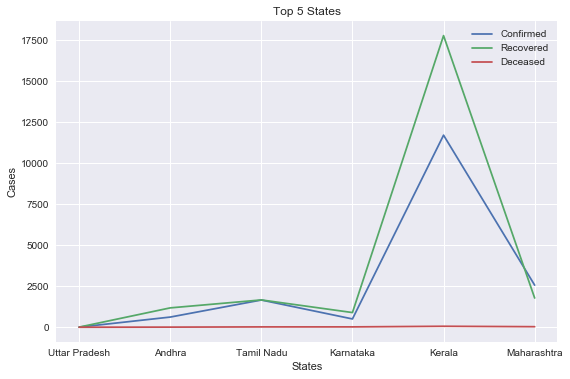

In [146]:
#create dataframe from csv file and sort in ascending order and select 6 tail records
d_parse=lambda x:pd.datetime.strptime(x,'%Y-%m-%d')
data1=pd.read_csv('states.csv',parse_dates=['Date'],date_parser=d_parse)
filt2=((data1.Date=='2021-09-27') & (data1.State!='India'))
df2=data1.loc[filt2,['Date','State','Confirmed','Recovered','Deceased','Tested']]
df2.sort_values(by=['Confirmed','Recovered','Deceased','Tested'],ascending=[True,True,True,True],inplace=True)
df27=df2[['Date','State','Confirmed','Recovered','Deceased','Tested']].tail(6)
# filter out country level rows
filt3=((data1.Date=='2021-09-26') & (data1.State!='India'))
df3=data1.loc[filt3,['Date','State','Confirmed','Recovered','Deceased','Tested']]
df3.sort_values(by=['Confirmed','Recovered','Deceased','Tested'],ascending=[True,True,True,True],inplace=True)
df26=df3[['Date','State','Confirmed','Recovered','Deceased','Tested']].tail(6)
# set State value as index
df_final=df27.set_index('State').subtract(df26.set_index('State'),axis=1)
df_final.reset_index(inplace=True)
df_final['State']=df_final.State.replace('Andhra Pradesh','Andhra') # Shorten Andhra Pradesh to Andhra 

#plt.style.use('fivethirtyeight') 
# create line chart
plt.style.use('seaborn')
x = np.arange(len(df_final['State'].tolist()))    
plt.plot(x,abs(df_final.Confirmed).tolist(),label='Confirmed')
plt.plot(x,abs(df_final.Recovered).tolist(),label='Recovered')
plt.plot(x,abs(df_final.Deceased).tolist(),label='Deceased')
plt.xticks(x, df_final['State'].tolist())  
plt.title('Top 5 States')
plt.xlabel('States')
plt.ylabel('Cases')
plt.legend()
plt.show()

###### Below chart shows cases and vaccination across five disticts of Karnataka

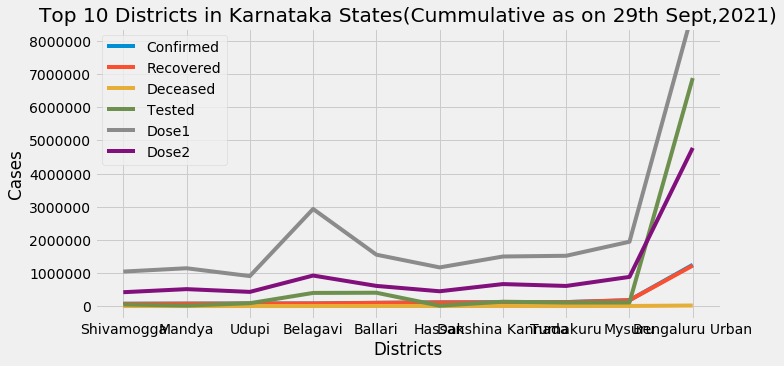

In [3]:
#create datafrom from JSON file 
import json
#data2=pd.read_json('https://data.covid19india.org/v4/min/data.min.json') # This access is timing out
data2=pd.read_json('cowin.json')
data2
vdf=data2.KA.districts #create a datafrom for only KA column
json_object=json.dumps(vdf) # dump list format data into a JSON Object
d=pd.read_json(json_object) # create datafrom from JSON object
line=[]

#In datafrom 'd' each row is adictionary format.Loop over dictionary object and store key-value pairs in alist
for index,value in d.loc['total'].items():
    for k,v in value.items():
        #print(index,',',k,',',v)
        line.append(index+','+k+','+str(v)+'\n')
       # print(line) -----
    
#Write contents of list to a file     
with open('vac.csv','w') as file:
    file.write('District'+','+'Case'+','+'Number'+'\n')
    for i in line:
        file.write(i)
       
# create datafrom from file and pivot dataframe
df=pd.read_csv('vac.csv',index_col='District')        
df1=df.pivot(columns='Case',values='Number')
df1.to_csv('vac2.csv')
df2=pd.read_csv('vac2.csv')
df2.rename(columns={'vaccinated1':'Dose1','vaccinated2':'Dose2','confirmed':'Confirmed','recovered':'Recovered','deceased':'Deceased','tested':'Tested'},inplace=True)
df2.sort_values(by=['Confirmed','Recovered','Deceased','Tested','Dose1','Dose2'],ascending=[True,True,True,True,True,True],inplace=True)
df3=df2.tail(10)
#plt.style.use('seaborn')
plt.style.use('fivethirtyeight')
x = np.arange(len(df3['District'].tolist())) 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(x,df3.Confirmed.tolist(),label='Confirmed')
plt.plot(x,df3.Recovered.tolist(),label='Recovered')
plt.plot(x,df3.Deceased.tolist(),label='Deceased')
plt.plot(x,df3.Tested.tolist(),label='Tested')
plt.plot(x,df3.Dose1.tolist(),label='Dose1')
plt.plot(x,df3.Dose2.tolist(),label='Dose2')
plt.xticks(x, df3['District'].tolist())  
scale_factor =0.9
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
#plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.title('Top 10 Districts in Karnataka States(Cummulative as on 29th Sept,2021)')
plt.xlabel('Districts')
plt.ylabel('Cases')
plt.legend()
plt.show()

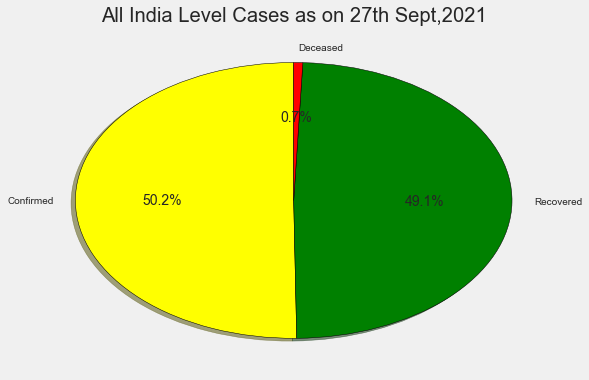

In [187]:
d_parse=lambda x:pd.datetime.strptime(x,'%Y-%m-%d')
data1=pd.read_csv('states.csv',parse_dates=['Date'],date_parser=d_parse)
filt2=((data1.Date=='2021-09-27') & (data1.State=='India'))
df2=data1.loc[filt2,['Date','State','Confirmed','Recovered','Deceased','Tested']]
case_labels=['Confirmed','Recovered','Deceased']
colors=['yellow','green','red']
case_values=[df2.iloc[0].Confirmed,df2.iloc[0].Recovered,df2.iloc[0].Deceased]
case_values
explode=[0,0,0,0.1,0]
plt.pie(case_values,labels=case_labels,shadow=True,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black'},colors=colors)
plt.title('All India Level Cases as on 27th Sept,2021')
plt.tight_layout()
plt.show()